In [166]:
import pandas as pd
import numpy as np 
import plotly.offline as py
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from geopy.geocoders import Nominatim
import folium
from folium.plugins import HeatMap
from geopy.exc import GeocoderTimedOut, GeocoderUnavailable

sns.set_style('white')

In [167]:
#after imputation
data_deu = pd.read_csv('C:/Users/a0095989/Desktop/important/Thesis/Model_Thesis/imputed_deu_data1.csv', parse_dates=[0])
# Verify dataset loading
#print(data_deu.head())


In [168]:
data_ind = data_deu[data_deu['Country']=='Germany']
#data_deu.head()

In [169]:
data_ind.shape

(262359, 12)

In [170]:
data_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262359 entries, 0 to 262358
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             262359 non-null  datetime64[ns]
 1   AverageTemperature             262359 non-null  float64       
 2   AverageTemperatureUncertainty  262359 non-null  float64       
 3   City                           262359 non-null  object        
 4   Country                        262359 non-null  object        
 5   Latitude                       262359 non-null  object        
 6   Longitude                      262359 non-null  object        
 7   TemperatureAnomaly             262359 non-null  float64       
 8   Year                           262359 non-null  int64         
 9   Month                          262359 non-null  int64         
 10  Season                         262359 non-null  object        
 11  

In [171]:
data_ind.describe([.25,.50,.75,.90,.95])

,dt,AverageTemperature,AverageTemperatureUncertainty,TemperatureAnomaly,Year,Month,TemperatureChange
count,262359,262359.000000,262359.000000,2.623590e+05,262359.000000,262359.000000,262278.000000
mean,1878-09-30 21:41:17.431306752,8.489331,1.614473,1.280477e-16,1878.291757,6.498919,0.002417
min,1743-11-01 00:00:00,-12.008000,0.055000,-1.940859e+01,1743.000000,1.000000,-13.345000
25%,1811-04-01 00:00:00,2.810000,0.298000,-5.726850e+00,1811.000000,3.000000,-3.250000
50%,1878-10-01 00:00:00,8.399000,0.662000,-1.466057e-01,1878.000000,6.000000,0.203000
75%,1946-04-01 00:00:00,14.816000,2.179000,6.317656e+00,1946.000000,9.000000,3.099000
90%,1986-10-01 00:00:00,17.235000,4.292000,8.681656e+00,1986.000000,11.000000,5.130000
95%,2000-04-01 00:00:00,18.127000,5.859000,9.614118e+00,2000.000000,12.000000,6.379000
max,2013-09-01 00:00:00,23.795000,14.828000,1.489941e+01,2013.000000,12.000000,16.573000
std,NaN,6.778794,2.023411,6.738203e+00,77.918891,3.452044,4.064085


Step2: EDA
Univariate Analysis

C:\Users\a0095989\AppData\Local\Temp\ipykernel_15484\1291012885.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='AverageTemperature', ylabel='Density'>

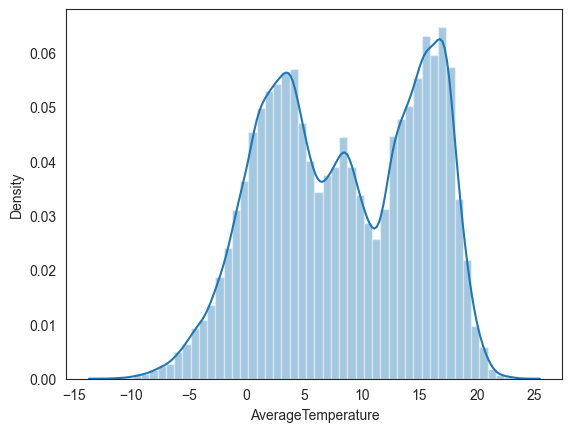

In [172]:
#univariate analysis for average temperature
sns.distplot(data_ind['AverageTemperature'])

C:\Users\a0095989\AppData\Local\Temp\ipykernel_15484\1259859377.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='AverageTemperatureUncertainty', ylabel='Density'>

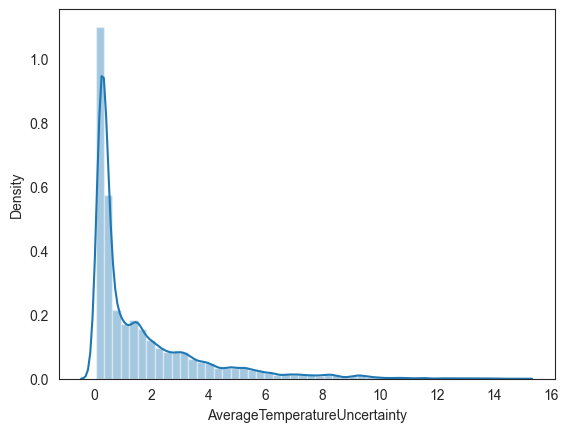

In [173]:
sns.distplot(data_ind['AverageTemperatureUncertainty'])

Multivariate Analysis

In [174]:
def boxplt(i):
    sns.boxplot(
        x=data_ind[data_ind['City'] == i]['City'],
        y=data_ind[data_ind['City'] == i]['AverageTemperature'],
        color='c'
    )
    plt.tight_layout()


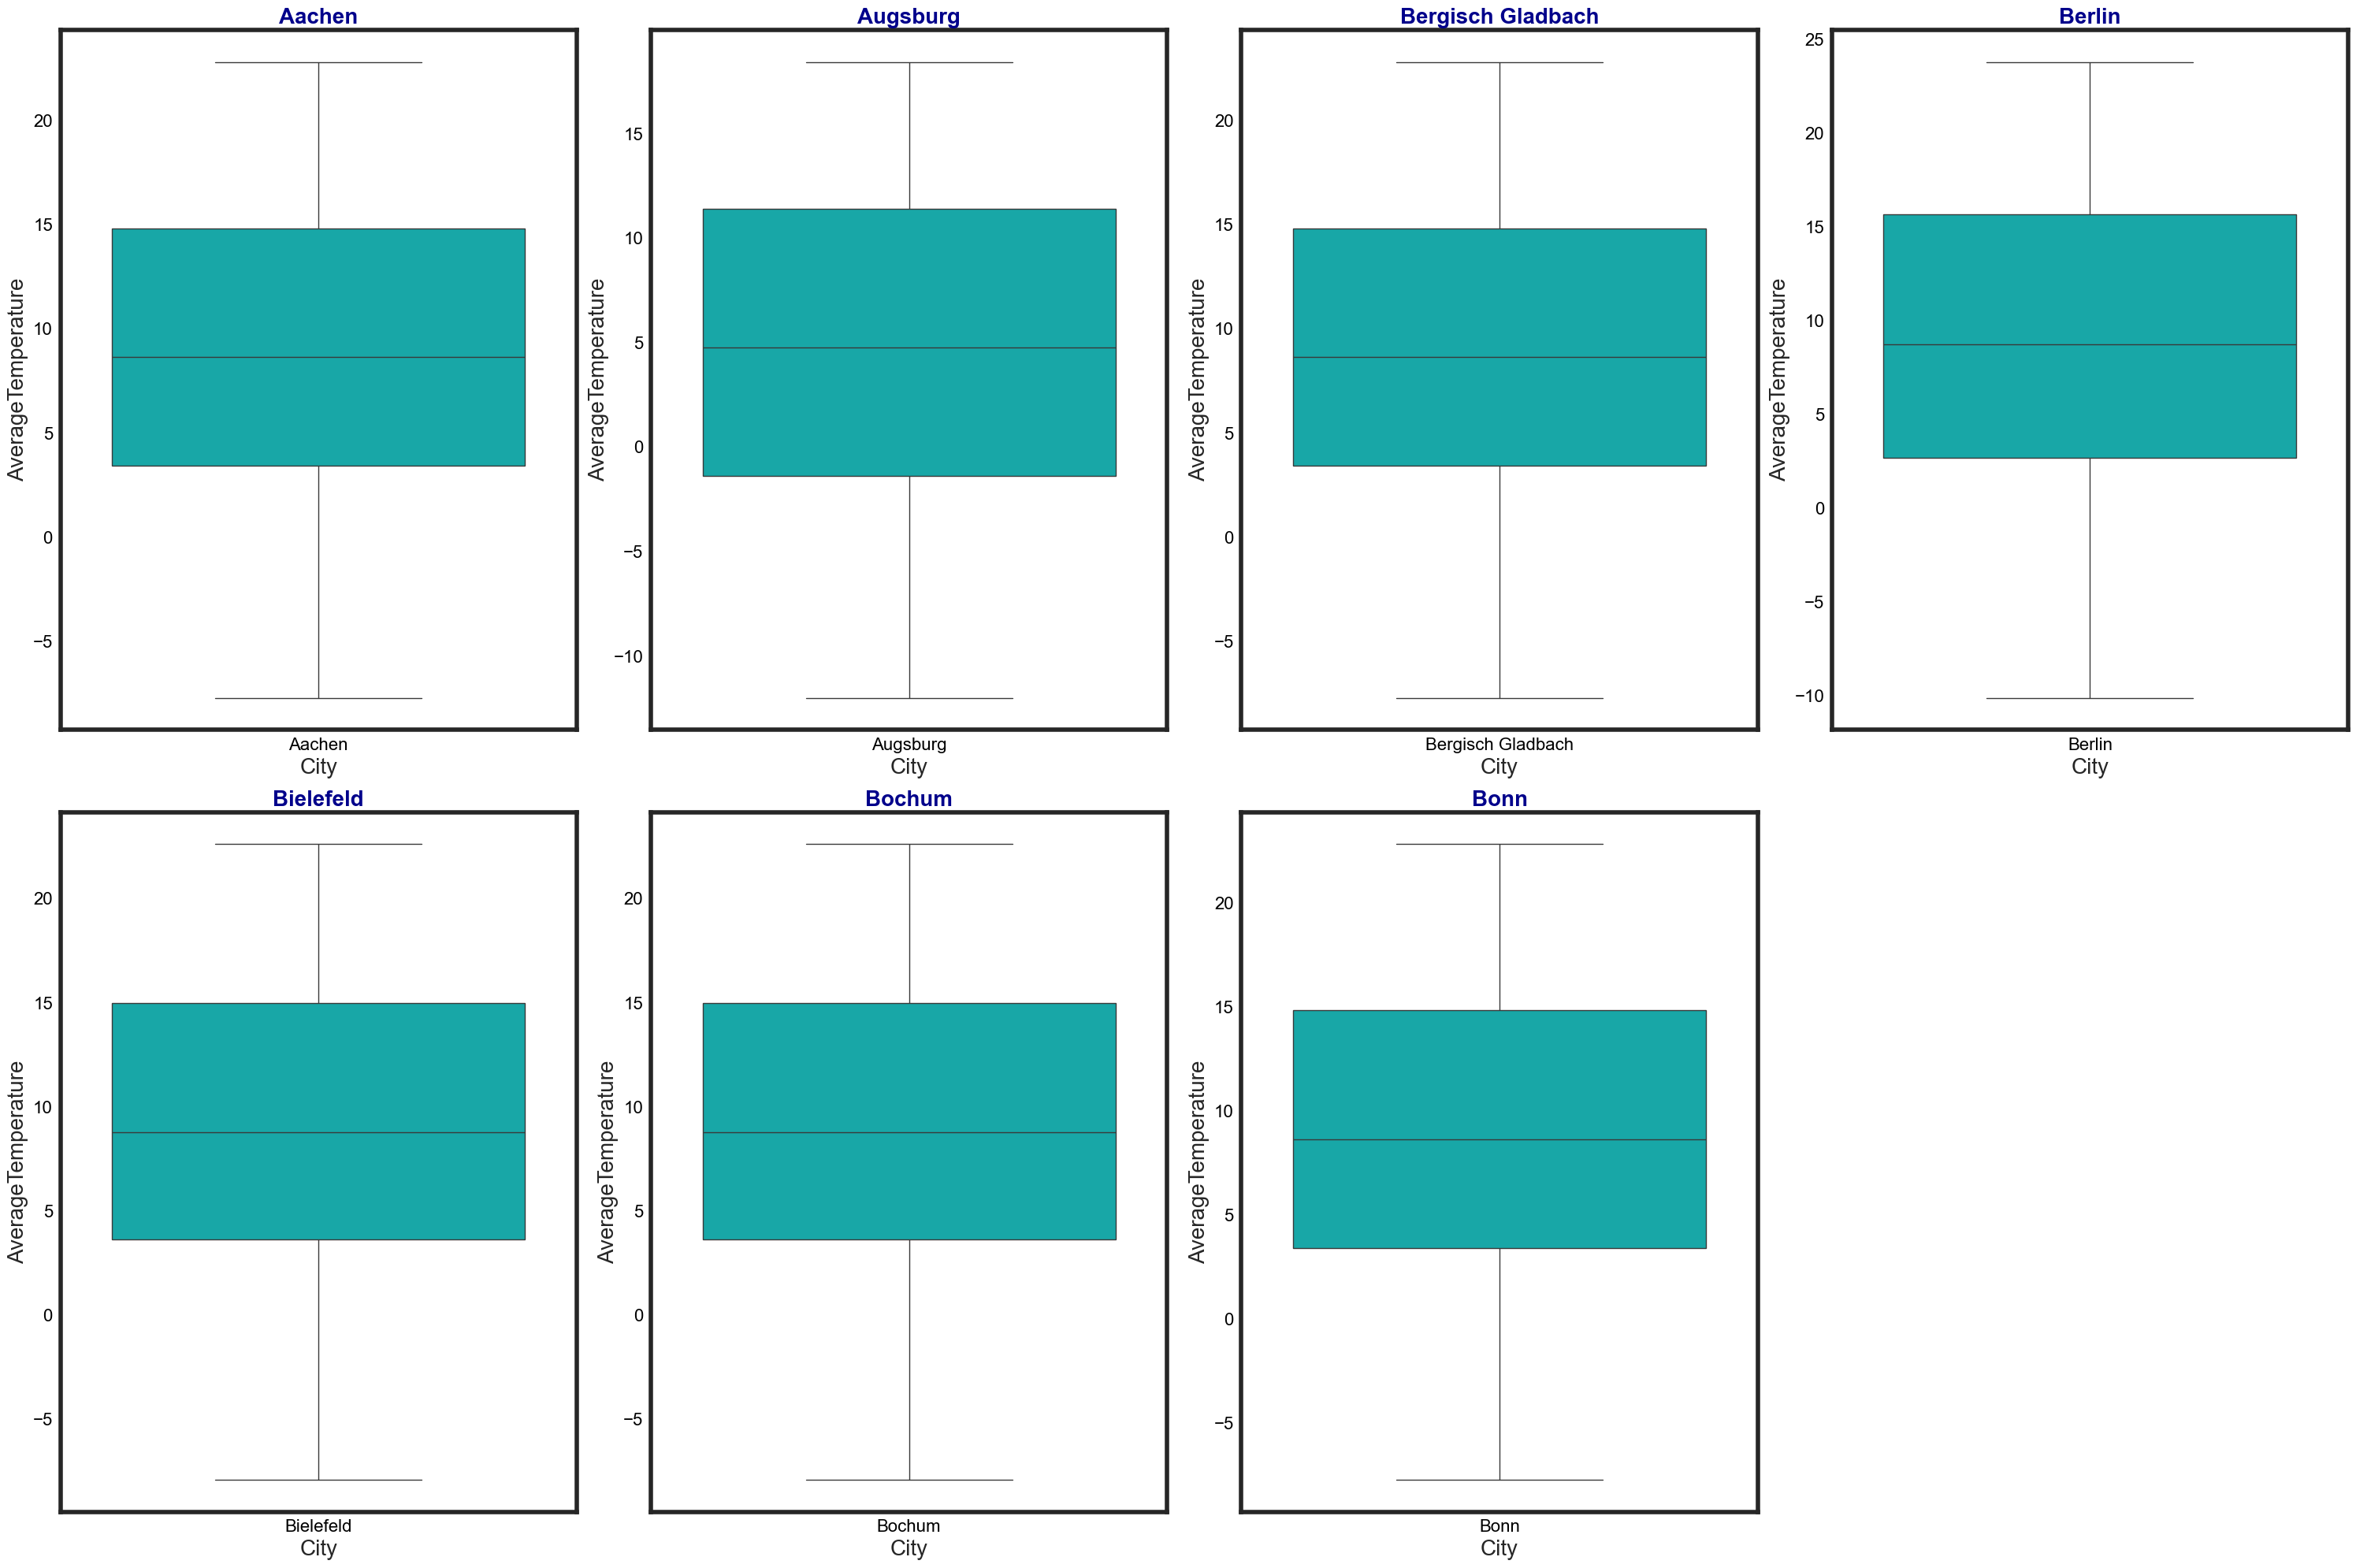

In [175]:
plt.figure(figsize=(30, 20))

# Loop through cities and create subplots
for l, i in enumerate(['Aachen', 'Augsburg', 'Bergisch Gladbach', 'Berlin', 'Bielefeld', 'Bochum', 'Bonn']):
    plt.subplot(2, 4, l + 1)  # Use 2 rows, 4 columns (adjust based on the number of cities)
    
    # Assuming boxplt is your custom function to plot boxplots
    boxplt(i)
    
    # Darken and increase the visibility of various elements
    plt.title(i, fontsize=20, fontweight='bold', color='darkblue')  # Darker title
    plt.xticks(fontsize=16, color='black')  # Larger x-ticks
    plt.yticks(fontsize=16, color='black')  # Larger y-ticks
    plt.gca().spines['top'].set_visible(True)  # Show the top spine
    plt.gca().spines['right'].set_visible(True)  # Show the right spine
    plt.gca().spines['bottom'].set_linewidth(4)  # Thicker bottom border
    plt.gca().spines['left'].set_linewidth(4)  # Thicker left border
    plt.gca().spines['top'].set_linewidth(4)  # Thicker top border
    plt.gca().spines['right'].set_linewidth(4)  # Thicker right border
    plt.gca().xaxis.label.set_size(20)  # Larger x-axis label
    plt.gca().yaxis.label.set_size(20)  # Larger y-axis label

# Adjust spacing between subplots for better readability
plt.tight_layout()
plt.show()



In [176]:
print(data_ind.dtypes)


dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
TemperatureAnomaly                      float64
Year                                      int64
Month                                     int64
Season                                   object
TemperatureChange                       float64
dtype: object


Century Analysis
18th century
19th century
20th century

In [177]:
# Define the numeric columns to calculate the mean
numeric_cols = ['AverageTemperature', 'AverageTemperatureUncertainty']

# Filter for 19th century temperatures and group by 'City'
century_temp_18 = data_ind[(data_ind['dt'] >= '1800-01-01') & (data_ind['dt'] < '1900-01-01')]
century_temp_18 = century_temp_18.groupby('City')[numeric_cols].mean()

# Filter for 20th century temperatures and group by 'City'
century_temp_19 = data_ind[(data_ind['dt'] >= '1900-01-01') & (data_ind['dt'] < '2000-01-01')]
century_temp_19 = century_temp_19.groupby('City')[numeric_cols].mean()

# Filter for 21st century temperatures and group by 'City'
century_temp_20 = data_ind[(data_ind['dt'] >= '2000-01-01') & (data_ind['dt'] < '2100-01-01')]
century_temp_20 = century_temp_20.groupby('City')[numeric_cols].mean()


Verifications:
Check that the filtering and grouping work correctly

In [178]:
print(century_temp_18.head())
print(century_temp_19.head())
print(century_temp_20.head())


                   AverageTemperature  AverageTemperatureUncertainty
City                                                                
Aachen                       8.547264                       1.675458
Augsburg                     4.365536                       1.720842
Bergisch Gladbach            8.547264                       1.675458
Berlin                       8.616107                       1.664897
Bielefeld                    8.701503                       1.678258
                   AverageTemperature  AverageTemperatureUncertainty
City                                                                
Aachen                       9.012111                       0.305904
Augsburg                     4.809650                       0.428920
Bergisch Gladbach            9.012111                       0.305904
Berlin                       9.111492                       0.276775
Bielefeld                    9.177860                       0.297889
                   AverageTemperat

In [179]:
l1 = [century_temp_18, century_temp_19, century_temp_20]

century_comb = reduce(lambda left,right: pd.merge(left,right,on=['City'], suffixes=('_18','_19')), l1)
century_comb.columns = ['AverageTemperature_18','AverageTemperatureUncertainty_18', 'AverageTemperature_19','AverageTemperatureUncertainty_19',
                        'AverageTemperature_20','AverageTemperatureUncertainty_20']

In [180]:
#Verifications:
print(century_comb.head())


                   AverageTemperature_18  AverageTemperatureUncertainty_18  \
City                                                                         
Aachen                          8.547264                          1.675458   
Augsburg                        4.365536                          1.720842   
Bergisch Gladbach               8.547264                          1.675458   
Berlin                          8.616107                          1.664897   
Bielefeld                       8.701503                          1.678258   

                   AverageTemperature_19  AverageTemperatureUncertainty_19  \
City                                                                         
Aachen                          9.012111                          0.305904   
Augsburg                        4.809650                          0.428920   
Bergisch Gladbach               9.012111                          0.305904   
Berlin                          9.111492                       

In [181]:
#Verifications:
print(century_comb.head())


                   AverageTemperature_18  AverageTemperatureUncertainty_18  \
City                                                                         
Aachen                          8.547264                          1.675458   
Augsburg                        4.365536                          1.720842   
Bergisch Gladbach               8.547264                          1.675458   
Berlin                          8.616107                          1.664897   
Bielefeld                       8.701503                          1.678258   

                   AverageTemperature_19  AverageTemperatureUncertainty_19  \
City                                                                         
Aachen                          9.012111                          0.305904   
Augsburg                        4.809650                          0.428920   
Bergisch Gladbach               9.012111                          0.305904   
Berlin                          9.111492                       

In [182]:
century_comb['Diff18_20'] = [y-i for i,y in zip(century_comb['AverageTemperature_18'], century_comb['AverageTemperature_20'])]
order_century_comb = century_comb.sort_values(by='Diff18_20', ascending=False)

In [183]:

# Reset the index after sorting for the final DataFrame (if you are using 'order_century_comb')
order_century_comb = order_century_comb.reset_index()

# Now print the desired columns
print(order_century_comb[['City', 'AverageTemperature_18', 'AverageTemperature_20', 'Diff18_20']].head())

         City  AverageTemperature_18  AverageTemperature_20  Diff18_20
0     Dresden               7.938811               9.534836   1.596026
1    Chemnitz               7.938811               9.534836   1.596026
2    Ratisbon               7.464431               9.038564   1.574133
3   Nuremberg               7.464431               9.038564   1.574133
4  Ingolstadt               7.464431               9.038564   1.574133


In [184]:
print(order_century_comb[:5].index)
print(order_century_comb[-6:-1].index)

RangeIndex(start=0, stop=5, step=1)
RangeIndex(start=75, stop=80, step=1)


In [185]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=century_temp_18['AverageTemperature'], x=century_temp_18.index,name='18th Century'))
fig.add_trace(go.Scatter(y=century_temp_19['AverageTemperature'], x=century_temp_19.index, name='19th Century'))
fig.add_trace(go.Scatter(y=century_temp_20['AverageTemperature'], x=century_temp_20.index, name='20th Century'))
fig.update_xaxes(rangeslider_visible=True, title_text = 'Cities')
fig.update_yaxes(title_text='Mean Temperature')
fig.update_layout(title = 'Mean Temperature For Cities (Every Century)', height=800, width=1500)
fig.show()

In [186]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=century_comb['Diff18_20'], x=century_comb.index,name='Temperature'))

fig.update_xaxes(rangeslider_visible=True, title_text = 'Cities')
fig.update_yaxes(title_text='Mean Temperature')
fig.update_layout(title = 'Mean Temperature Increase from 18th to 20th Century (For Cities)', height=800, width=1500)
fig.show()

In [187]:
lat_lon = []
geolocater = Nominatim(user_agent='app',timeout=4)
for location in century_comb.index:
  location = geolocater.geocode(location)
  if location is None:
    lat_lon.append(np.nan)
  else:
    geo = (location.latitude, location.longitude)
    lat_lon.append(geo)

century_comb['geo'] = lat_lon

In [188]:
century_comb_copy = century_comb.copy()
century_comb_copy.dropna(inplace=True)
lat, lon = zip(*np.array(century_comb_copy['geo']))
century_comb_copy['lat'] = lat
century_comb_copy['lon'] = lon 

In [189]:
#heatmap1
import folium
from folium.plugins import HeatMap
from folium.map import LayerControl

# Create the base map
basemap = folium.Map(control_scale=True, zoom_start=5, location=(20.5937, 78.9629))

# Add the heatmap
HeatMap(century_comb_copy[['lat', 'lon', 'Diff18_20']].values.tolist(), radius=15).add_to(basemap)

# Create an HTML legend
legend_html = '''
<div style="
    position: fixed; 
    bottom: 50px; left: 50px; width: 300px; height: 180px; 
    background-color: white; 
    border:2px solid grey; 
    border-radius: 10px; 
    box-shadow: 2px 2px 5px grey;
    padding: 10px;
    font-size: 14px;
    z-index:9999;
">
<b>Temperature Trends:</b><br>
<span style="color:red; font-weight:bold;">Red Areas:</span> Significant temp increases over two centuries.<br>
<span style="color:orange; font-weight:bold;">Yellow Areas:</span> Moderate increases in temp.<br>
<span style="color:green; font-weight:bold;">Green Areas:</span> Moderate increases in temp.<br>
<span style="color:blue; font-weight:bold;">Blue Areas:</span> Lower temp increases, less impacted.<br>
</div>
'''

# Add the legend to the map
basemap.get_root().html.add_child(folium.Element(legend_html))

# Show the map
basemap


Decade Analysis

In [190]:
numeric_cols = ['AverageTemperature', 'AverageTemperatureUncertainty']  # Add more columns if necessary

# Apply aggregation for the selected numeric columns
decade_19_1 = data_ind[(data_ind['dt'] >= '1910-01-01') & (data_ind['dt'] < '1920-01-01')]
decade_19_1 = decade_19_1.groupby('City')[numeric_cols].agg('mean')

decade_19_2 = data_ind[(data_ind['dt'] >= '1920-01-01') & (data_ind['dt'] < '1930-01-01')]
decade_19_2 = decade_19_2.groupby('City')[numeric_cols].agg('mean')

decade_19_3 = data_ind[(data_ind['dt'] >= '1930-01-01') & (data_ind['dt'] < '1940-01-01')]
decade_19_3 = decade_19_3.groupby('City')[numeric_cols].agg('mean')

decade_19_4 = data_ind[(data_ind['dt'] >= '1940-01-01') & (data_ind['dt'] < '1950-01-01')]
decade_19_4 = decade_19_4.groupby('City')[numeric_cols].agg('mean')

decade_19_5 = data_ind[(data_ind['dt'] >= '1950-01-01') & (data_ind['dt'] < '1960-01-01')]
decade_19_5 = decade_19_5.groupby('City')[numeric_cols].agg('mean')

decade_19_6 = data_ind[(data_ind['dt'] >= '1960-01-01') & (data_ind['dt'] < '1970-01-01')]
decade_19_6 = decade_19_6.groupby('City')[numeric_cols].agg('mean')

decade_19_7 = data_ind[(data_ind['dt'] >= '1970-01-01') & (data_ind['dt'] < '1980-01-01')]
decade_19_7 = decade_19_7.groupby('City')[numeric_cols].agg('mean')

decade_19_8 = data_ind[(data_ind['dt'] >= '1980-01-01') & (data_ind['dt'] < '1990-01-01')]
decade_19_8 = decade_19_8.groupby('City')[numeric_cols].agg('mean')

decade_19_9 = data_ind[(data_ind['dt'] >= '1990-01-01') & (data_ind['dt'] < '2000-01-01')]
decade_19_9 = decade_19_9.groupby('City')[numeric_cols].agg('mean')

decade_20_1 = data_ind[(data_ind['dt'] >= '2000-01-01') & (data_ind['dt'] < '2010-01-01')]
decade_20_1 = decade_20_1.groupby('City')[numeric_cols].agg('mean')

decade_20_2 = data_ind[(data_ind['dt'] >= '2010-01-01') & (data_ind['dt'] < '2020-01-01')]
decade_20_2 = decade_20_2.groupby('City')[numeric_cols].agg('mean')


In [191]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=decade_19_1['AverageTemperature'], x=decade_19_1.index,name='1910'))
fig.add_trace(go.Scatter(y=decade_19_2['AverageTemperature'], x=decade_19_2.index, name='1920'))
fig.add_trace(go.Scatter(y=decade_19_3['AverageTemperature'], x=decade_19_3.index, name='1930'))
fig.add_trace(go.Scatter(y=decade_19_4['AverageTemperature'], x=decade_19_4.index, name='1940'))
fig.add_trace(go.Scatter(y=decade_19_5['AverageTemperature'], x=decade_19_5.index, name='1950'))
fig.add_trace(go.Scatter(y=decade_19_6['AverageTemperature'], x=decade_19_6.index, name='1960'))
fig.add_trace(go.Scatter(y=decade_19_7['AverageTemperature'], x=decade_19_7.index, name='1970'))
fig.add_trace(go.Scatter(y=decade_19_8['AverageTemperature'], x=decade_19_8.index, name='1980'))
fig.add_trace(go.Scatter(y=decade_19_9['AverageTemperature'], x=decade_19_9.index, name='1990'))
fig.add_trace(go.Scatter(y=decade_20_1['AverageTemperature'], x=decade_20_1.index, name='2000'))
fig.add_trace(go.Scatter(y=decade_20_2['AverageTemperature'], x=decade_20_2.index, name='2010'))



In [192]:
fig.update_xaxes(rangeslider_visible=True, title_text = 'Cities')
fig.update_yaxes(title_text='Mean Temperature')
fig.update_layout(title = 'Mean Temperature For Cities (Every Decade)', height=800, width=1500)
fig.show()

In [194]:
# Merge the DataFrames with unique suffixes
decade_comb = reduce(
    lambda left, right: pd.merge(left, right, on=['City'], suffixes=('', '_dup')),
    l1
)

# Rename the columns to the desired format
decade_comb.columns = [
    'AverageTemperature_1', 'AverageTemperatureUncertainty_1', 
    'AverageTemperature_2', 'AverageTemperatureUncertainty_2',
    'AverageTemperature_3', 'AverageTemperatureUncertainty_3',
    'AverageTemperature_4', 'AverageTemperatureUncertainty_4', 
    'AverageTemperature_5', 'AverageTemperatureUncertainty_5',
    'AverageTemperature_6', 'AverageTemperatureUncertainty_6',
    'AverageTemperature_7', 'AverageTemperatureUncertainty_7', 
    'AverageTemperature_8', 'AverageTemperatureUncertainty_8',
    'AverageTemperature_9', 'AverageTemperatureUncertainty_9', 
    'AverageTemperature_10', 'AverageTemperatureUncertainty_10',
    'AverageTemperature_11', 'AverageTemperatureUncertainty_11'
]


ValueError: Length mismatch: Expected axis has 6 elements, new values have 22 elements

In [195]:
decade_comb['Diff1_11'] = [y-i for i,y in zip(decade_comb['AverageTemperature_1'], decade_comb['AverageTemperature_11'])]
order_decade_comb = decade_comb.sort_values(by='Diff1_11', ascending=False)

KeyError: 'AverageTemperature_1'

In [196]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=decade_comb['Diff1_11'], x=decade_comb.index,name='Temperature'))

fig.update_xaxes(rangeslider_visible=True, title_text = 'Cities')
fig.update_yaxes(title_text='Mean Temperature')
fig.update_layout(title = 'Mean Temperature Increase every Decade (For Cities)', height=800, width=1500)
fig.show()

KeyError: 'Diff1_11'

In [197]:
print(order_decade_comb[:5].index)
print(order_decade_comb[-6:-1].index)

Index(['Augsburg', 'Munich', 'Freiburg', 'Ingolstadt', 'Nuremberg'], dtype='object', name='City')
Index(['Rostock', 'Bremen', 'Bremerhaven', 'Lübeck', 'Hamburg'], dtype='object', name='City')


In [204]:
decade_comb['lat']  = century_comb_copy['lat'] 
decade_comb['lon']= century_comb_copy['lon'] 
decade_comb_copy = decade_comb.copy()
decade_comb_copy.dropna(inplace=True)

basemap = folium.Map(control_scale=True, zoom_start=5, location=(20.5937, 78.9629))
HeatMap(decade_comb_copy[['lat','lon', 'Diff1_11']].values.tolist(), radius=15).add_to(basemap)

basemap

KeyError: "['Diff1_11'] not in index"

LAst Decade

In [205]:
# Define the date range
date_range = pd.date_range('2003-01-01', '2013-01-01', freq='YS')

# Create an empty DataFrame to store results
last_decade = pd.DataFrame(index=century_comb.index)

# Loop over the date range
for y, i in enumerate(date_range):
    # Select data for the year range
    last_decade_y = data_ind[(data_ind['dt'] >= i) & (data_ind['dt'] < i.replace(year=i.year + (y + 1)))]
    
    # Ensure that only numeric columns are included for aggregation
    numeric_cols = ['AverageTemperature', 'AverageTemperatureUncertainty']  # specify the numeric columns to aggregate
    
    # Aggregate the numeric columns
    last_decade_y = last_decade_y.groupby('City')[numeric_cols].agg('mean')
    
    # Merge with the previous data (if any)
    last_decade = last_decade.merge(last_decade_y, on=['City'], how='left', suffixes=('', f'_{i.year}'))

# The resulting 'last_decade' dataframe will contain the average temperatures and uncertainties for each year in the range

  

In [206]:
last_decade.columns = ['AverageTemperature2003', 'AverageTemperatureUncertainity2003','AverageTemperature2004', 'AverageTemperatureUncertainity2004',
                       'AverageTemperature2005', 'AverageTemperatureUncertainity2005','AverageTemperature2006', 'AverageTemperatureUncertainity2006',
                       'AverageTemperature2007', 'AverageTemperatureUncertainity2007','AverageTemperature2008', 'AverageTemperatureUncertainity2008',
                       'AverageTemperature2009', 'AverageTemperatureUncertainity2009','AverageTemperature2010', 'AverageTemperatureUncertainity2010',
                       'AverageTemperature2011', 'AverageTemperatureUncertainity2011','AverageTemperature2012', 'AverageTemperatureUncertainity2012',
                       'AverageTemperature2013', 'AverageTemperatureUncertainity2013',]


In [207]:
last_decade['diff03_13'] =  last_decade['AverageTemperature2013'] - last_decade['AverageTemperature2003'] 
order_last_decade = last_decade.sort_values(by='diff03_13', ascending=False)

In [208]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=last_decade['AverageTemperature2003'], x=last_decade.index,name='2003'))
fig.add_trace(go.Scatter(y=last_decade['AverageTemperature2004'], x=last_decade.index, name='2004'))
fig.add_trace(go.Scatter(y=last_decade['AverageTemperature2005'], x=last_decade.index, name='2005'))
fig.add_trace(go.Scatter(y=last_decade['AverageTemperature2006'], x=last_decade.index, name='2006'))
fig.add_trace(go.Scatter(y=last_decade['AverageTemperature2007'], x=last_decade.index, name='2007'))
fig.add_trace(go.Scatter(y=last_decade['AverageTemperature2008'], x=last_decade.index, name='2008'))
fig.add_trace(go.Scatter(y=last_decade['AverageTemperature2009'], x=last_decade.index, name='2009'))
fig.add_trace(go.Scatter(y=last_decade['AverageTemperature2010'], x=last_decade.index, name='2010'))
fig.add_trace(go.Scatter(y=last_decade['AverageTemperature2011'], x=last_decade.index, name='2011'))
fig.add_trace(go.Scatter(y=last_decade['AverageTemperature2012'], x=last_decade.index, name='2012'))
fig.add_trace(go.Scatter(y=last_decade['AverageTemperature2013'], x=last_decade.index, name='2013'))

fig.update_xaxes(rangeslider_visible=True, title_text = 'Cities')
fig.update_yaxes(title_text='Mean Temperature')
fig.update_layout(title = 'Mean Temperature For Cities (Last Decade)', height=800, width=1500)
fig.show()

Mean Temp Increase from 2003-2013 for cities

In [209]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=last_decade['diff03_13'], x=last_decade.index,name='Temperature'))

fig.update_xaxes(rangeslider_visible=True, title_text = 'Cities')
fig.update_yaxes(title_text='Mean Temperature')
fig.update_layout(title = 'Mean Temperature Increase from 2003-2013 (For Cities)', height=800, width=1500)
fig.show()

In [210]:
print(order_last_decade[:5].index)
print(order_last_decade[-6:-1].index)

Index(['Augsburg', 'Munich', 'Ratisbon', 'Ingolstadt', 'Nuremberg'], dtype='object', name='City')
Index(['Mülheim', 'Neuss', 'Mönchengladbach', 'Remscheid', 'Solingen'], dtype='object', name='City')


In [211]:
last_decade['lat']  = century_comb_copy['lat'] 
last_decade['lon']= century_comb_copy['lon'] 
last_decade_copy = last_decade.copy()
last_decade_copy.dropna(inplace=True)

basemap = folium.Map(control_scale=True, zoom_start=5, location=(20.5937, 78.9629))
HeatMap(last_decade_copy[['lat','lon', 'diff03_13']].values.tolist(), radius=15).add_to(basemap)

basemap